In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def correlate_weiner_process(X, Sigma, dt):
    L = np.linalg.cholesky(Sigma).T
    return np.sqrt(dt) * np.dot(L, X)

def update_process_value_cir(xt, dt, alpha, mu, sigma, dZt):
    """
    Parameters:
    - xt: Current value of the process
    - dt: Time increment
    - alpha: Speed of reversion
    - mu: Long-term mean of the process
    - sigma: Volatility parameter
    - dZt: Random increment from a normal distribution

    Returns:
    - Updated process value
    """
    dxt_drift = alpha * (mu - xt) * dt
    dxt_stochastic_variation = sigma * np.sqrt(max(xt, 0)) * dZt  
    return xt + dxt_drift + dxt_stochastic_variation

def generate_process_cir(x0, dt, alpha, mu, sigma, dZ):
    """
    Generate a trajectory of the CIR process.

    Parameters:
    - x0: Initial value of the process
    - dt: Time increment
    - alpha: Speed of reversion
    - mu: Long-term mean of the process
    - sigma: Volatility parameter
    - dZ: Array of random increments from a normal distribution

    Returns:
    - Array of process values
    """
    x = [x0]
    for dZt in dZ:
        xt = x[-1]  
        x.append(update_process_value_cir(xt, dt, alpha, mu, sigma, dZt))
    return np.array(x)


In [19]:
#parameters
nYears = 100
dt= 1/12
nFactors=2
nTrials = 10000
rho = 0.739 
weinerSigma = np.array([[1, rho],
                        [rho, 1]])
weinerL = np.linalg.cholesky(weinerSigma).T

In [3]:
#initial_values
x_10 = 0.0228
x_20 = 0.0809

#more parameters (alpha etc)
a_1 = 1.0682
m_1 = 0.0546
s_1 = 0.0412
a_2 = 0.0469
m_2 = 0.0778
s_2 = 0.0287


In [20]:
start_time = time.time()

nominal_short_rates = []
for _ in range(nTrials):
    #random variable X, (2,nfactors*nYears/dt) matrix 
    X = np.random.normal(size=int(nFactors * nYears / dt)).reshape(2,-1)
    
    #find dZ
    dZ = correlate_weiner_process(X,weinerL,dt)
    x_1 = generate_process_cir(x_10, dt, a_1, m_1, s_1, dZ[0])
    x_2 = generate_process_cir(x_20, dt, a_2, m_2, s_2, dZ[1])
    phi = 0.045 - (x_10 + x_20)
    n = phi + x_1 + x_2
    nominal_short_rates.append(n)
end_time = time.time()
print("Simulation time:", end_time - start_time, "seconds")

Simulation time: 18.3903067111969 seconds


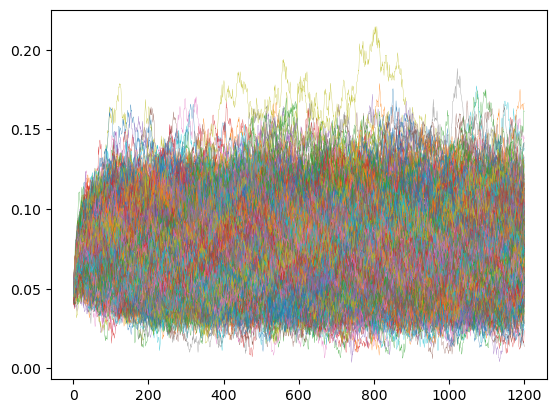

In [17]:
for i in range(nTrials):
    plt.plot(nominal_short_rates[i],linewidth=0.2)